In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.10.0


In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib

In [4]:
data_dir = './dataset/2_class'

In [5]:
data_root = pathlib.Path(data_dir)

In [6]:
data_root

WindowsPath('dataset/2_class')

In [7]:
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [8]:
all_image_paths = list(data_root.glob("*/*"))

In [9]:
image_count = len(all_image_paths)

In [10]:
image_count

1400

In [11]:
all_image_paths[:3]

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [12]:
import  random

In [13]:
# 把path对象转换成字符串地址
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
image_count

1400

In [14]:
all_image_paths[:5]

['dataset\\2_class\\airplane\\airplane_345.jpg',
 'dataset\\2_class\\lake\\lake_682.jpg',
 'dataset\\2_class\\airplane\\airplane_214.jpg',
 'dataset\\2_class\\airplane\\airplane_193.jpg',
 'dataset\\2_class\\lake\\lake_277.jpg']

In [15]:
# 提取标签，也就是上一层的路径的名称
label_names = sorted(item.name for item in data_root.glob("*/") if item.is_dir())
label_names

['airplane', 'lake']

In [16]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'airplane': 0, 'lake': 1}

In [17]:
# 获取所有图片对应的label标签
# name = pathlib.Path(all_image_paths[0]).parent.name
# print(label_to_index[name])
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
all_image_labels[:10]

[0, 1, 0, 0, 1, 1, 1, 0, 0, 0]

In [18]:
import IPython.display as display

In [19]:
index_to_label = dict((v,k) for k,v in label_to_index.items())
index_to_label

{0: 'airplane', 1: 'lake'}

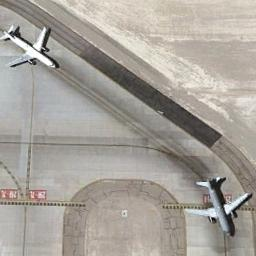

airplane



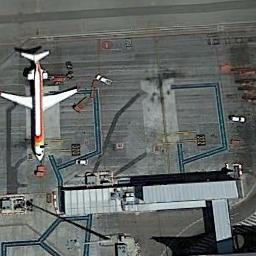

airplane



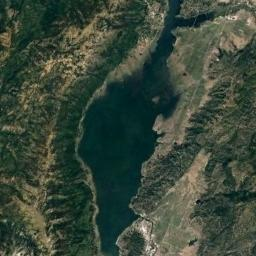

lake



In [20]:
for n in range(3):
    image_index = random.choice(range(len(all_image_paths)))
    display.display(display.Image(all_image_paths[image_index]))
    print(index_to_label[all_image_labels[image_index]])
    print()

# 加载和格式化图像

In [21]:
img_path = all_image_paths[0]
img_path

'dataset\\2_class\\airplane\\airplane_345.jpg'

#### 读去图片出来，读取格式是二进制形式

In [22]:
# 读取图片
img_row = tf.io.read_file(img_path)

In [23]:
img_row

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

### 解码图片形式，从二进制形式解码

In [24]:
# 解码文件
img_tensor = tf.image.decode_image(img_row)

In [25]:
img_tensor.shape

TensorShape([256, 256, 3])

In [26]:
img_tensor.dtype

tf.uint8

In [27]:
img_tensor

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[153, 152, 131],
        [146, 145, 124],
        [147, 146, 128],
        ...,
        [153, 154, 140],
        [149, 150, 136],
        [145, 146, 132]],

       [[150, 149, 129],
        [144, 143, 123],
        [154, 153, 135],
        ...,
        [150, 151, 137],
        [147, 148, 134],
        [144, 145, 131]],

       [[152, 151, 133],
        [136, 135, 117],
        [136, 137, 123],
        ...,
        [149, 150, 136],
        [148, 149, 135],
        [146, 147, 133]],

       ...,

       [[ 91,  86,  83],
        [ 81,  76,  72],
        [ 86,  81,  77],
        ...,
        [ 52,  51,  46],
        [ 49,  48,  43],
        [ 56,  55,  50]],

       [[102,  96,  96],
        [ 79,  74,  71],
        [ 78,  73,  70],
        ...,
        [ 62,  61,  57],
        [ 49,  48,  43],
        [ 40,  39,  34]],

       [[ 77,  71,  71],
        [ 69,  63,  63],
        [ 83,  78,  75],
        ...,
        [ 79,  78,  7

In [28]:
# 转换数据类型
img_tensor = tf.cast(img_tensor, tf.float32)

In [29]:
# 图片数据标准化
img_tensor = img_tensor / 255

In [30]:
img_tensor.numpy().max()

1.0

In [31]:
img_tensor.numpy().min()

0.0

#### 单张图片读取和解码完毕

In [32]:
# 将读取图片和解码图片做成一个函数
def load_perprosess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image / 255
    return image

In [33]:
image_path = all_image_paths[100]

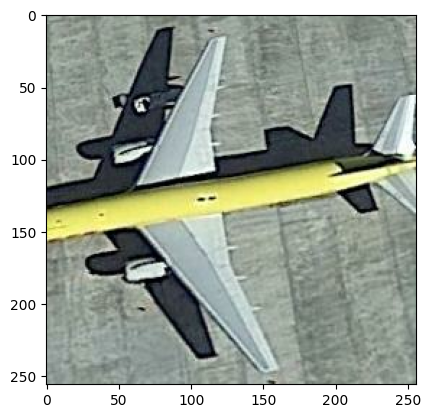

In [34]:
plt.imshow(load_perprosess_image(image_path))

In [35]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [36]:
image_dataset = path_ds.map(load_perprosess_image)

In [37]:
image_dataset

<MapDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>

In [38]:
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_labels)

In [39]:
label_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [40]:
for label in label_dataset.take(10):
    print(label.numpy())

0
1
0
0
1
1
1
0
0
0


In [41]:
for image in image_dataset.take(2):
    print(image.numpy())

[[[0.6        0.59607846 0.5137255 ]
  [0.57254905 0.5686275  0.4862745 ]
  [0.5764706  0.57254905 0.5019608 ]
  ...
  [0.6        0.6039216  0.54901963]
  [0.58431375 0.5882353  0.53333336]
  [0.5686275  0.57254905 0.5176471 ]]

 [[0.5882353  0.58431375 0.5058824 ]
  [0.5647059  0.56078434 0.48235294]
  [0.6039216  0.6        0.5294118 ]
  ...
  [0.5882353  0.5921569  0.5372549 ]
  [0.5764706  0.5803922  0.5254902 ]
  [0.5647059  0.5686275  0.5137255 ]]

 [[0.59607846 0.5921569  0.52156866]
  [0.53333336 0.5294118  0.45882353]
  [0.53333336 0.5372549  0.48235294]
  ...
  [0.58431375 0.5882353  0.53333336]
  [0.5803922  0.58431375 0.5294118 ]
  [0.57254905 0.5764706  0.52156866]]

 ...

 [[0.35686275 0.3372549  0.3254902 ]
  [0.31764707 0.29803923 0.28235295]
  [0.3372549  0.31764707 0.3019608 ]
  ...
  [0.20392157 0.2        0.18039216]
  [0.19215687 0.1882353  0.16862746]
  [0.21960784 0.21568628 0.19607843]]

 [[0.4        0.3764706  0.3764706 ]
  [0.30980393 0.2901961  0.2784314 ]


In [42]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [43]:
dataset

<ZipDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

#### 80%作为训练集，20%作为测试集

In [44]:
test_count = int(image_count*0.2)
test_count

280

In [45]:
train_dataset = dataset.skip(test_count)
test_dataset = dataset.take(test_count)

In [46]:
len(train_dataset)
len(test_dataset)

280

In [47]:
len(train_dataset)

1120

In [48]:
BATCH_SIZE = 64

In [50]:
train_dataset = train_dataset.repeat().shuffle(1120).batch(BATCH_SIZE)

In [51]:
test_dataset = test_dataset.shuffle(280).batch(64)

# tf.data构造输入管道完

### 建立模型

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256,256,3), activation = "relu"))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation = "relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 252, 252, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                  

In [59]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [60]:
steps_per_epoch = (image_count-test_count)//BATCH_SIZE
vaildation_step = test_count//BATCH_SIZE

In [ ]:
model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=vaildation_step
)

Epoch 1/10
17/17 [==============================] - 872s 51s/step - loss: 0.6660 - acc: 0.5110 - val_loss: 0.4721 - val_acc: 0.5195
Epoch 2/10
12/17 [====================>.........] - ETA: 3:45 - loss: 0.3592 - acc: 0.8646